In [1]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

# Добавляем путь к корневой директории проекта
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from mathmod import approximation

In [2]:
a, b = - np.pi, np.pi
epsilon = 0.05

In [3]:
def f(x): 
    return np.sin(x ** 2)

In [4]:
def df(x): 
    return 2 * x * np.cos(x ** 2)

In [5]:
def calculate_list(a, b, n):
    x_list = np.linspace(a, b, n + 1)
    return x_list, f(x_list) 

In [6]:
def error(f, S, x_points):
    return np.abs(f(x_points) - S)

# Линейный сплайн

In [7]:
def spline_values(x_points, x_list, y_list):
    return np.array([approximation.linear_spline(x, x_list, y_list) for x in x_points])

In [8]:
def interpolate_linear(a, b, epsilon):
    n = 1  
    max_error = float('inf')
    errors = []

    while max_error > epsilon:
        x_list = np.linspace(a, b, n + 1)
        y_list = f(x_list)

        control_points = np.linspace(a, b, 1000)

        S = spline_values(control_points, x_list, y_list)
        current_error = error(f, S, control_points)
        max_error = np.max(current_error)
        errors.append((n, max_error))

        if max_error > epsilon:
            n += 1  

    x_points = np.linspace(a, b, 1000)

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(x_points, f(x_points), '--', label="Исходная функция f(x)")
    plt.plot(x_points, spline_values(x_points, x_list, y_list), label=f"Линейный сплайн, n = {n}")
    plt.title("Графики функции и интерполяции")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    # График погрешности
    plt.subplot(2, 2, 2)
    plt.plot(control_points, current_error, label="Погрешность интерполяции")
    plt.title("График погрешности интерполяции")
    plt.xlabel("x")
    plt.ylabel("Погрешность")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

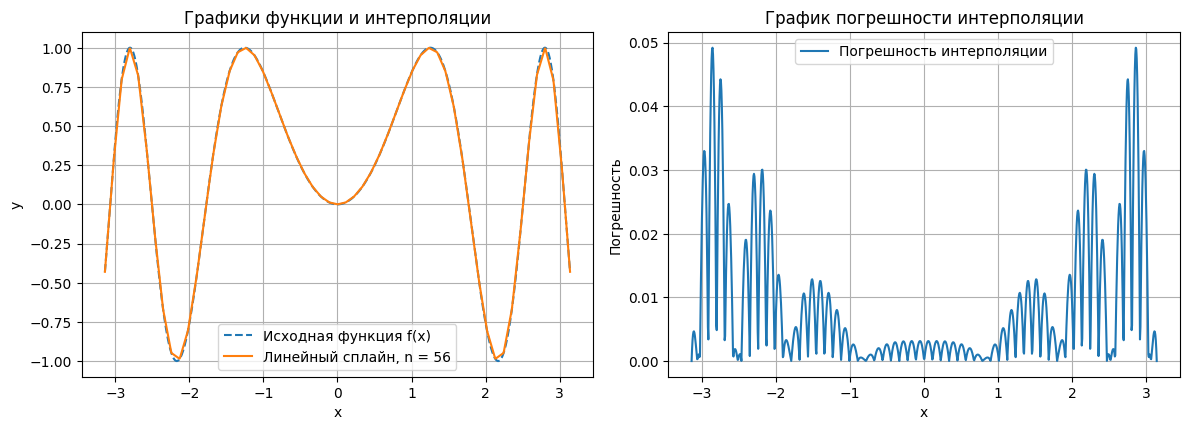

In [9]:
errors = interpolate_linear(a, b, epsilon)

# Многочлен Эрмита

In [10]:
def ermit(x, x_list, y_list, y_dir_list):
    for i in range(1, len(x_list)):
        if x_list[i - 1] <= x <= x_list[i]:  
            return approximation.ermit_polynomial(x, x_list[i], x_list[i - 1], y_list[i], y_list[i - 1],
                                    y_dir_list[i], y_dir_list[i - 1])
    return None


In [11]:
def interpolate_ermit(a, b, epsilon):
    n = 1  
    max_error = float('inf')
    errors = []

    while max_error > epsilon:

        x_list = np.linspace(a, b, n + 1)
        y_list = f(x_list)
        y_dir_list = df(x_list)


        control_points = np.linspace(a, b, 1000)

        P = np.array([ermit(x, x_list, y_list, y_dir_list) for x in control_points])

        current_error = error(f, P, control_points)
        max_error = np.max(current_error)
        errors.append((n, max_error))

        if max_error > epsilon:
            n += 1  

    x_points = np.linspace(a, b, 1000)

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(x_points, f(x_points), '--', label="Исходная функция f(x)")
    plt.plot(x_points, np.array([ermit(x, x_list, y_list, y_dir_list) for x in x_points]), label=f"Многочлен Эрмита, n = {n}")
    plt.title("Графики функции и интерполяции")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(control_points, current_error, label="Погрешность интерполяции")
    plt.title("График погрешности интерполяции")
    plt.xlabel("x")
    plt.ylabel("Погрешность")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

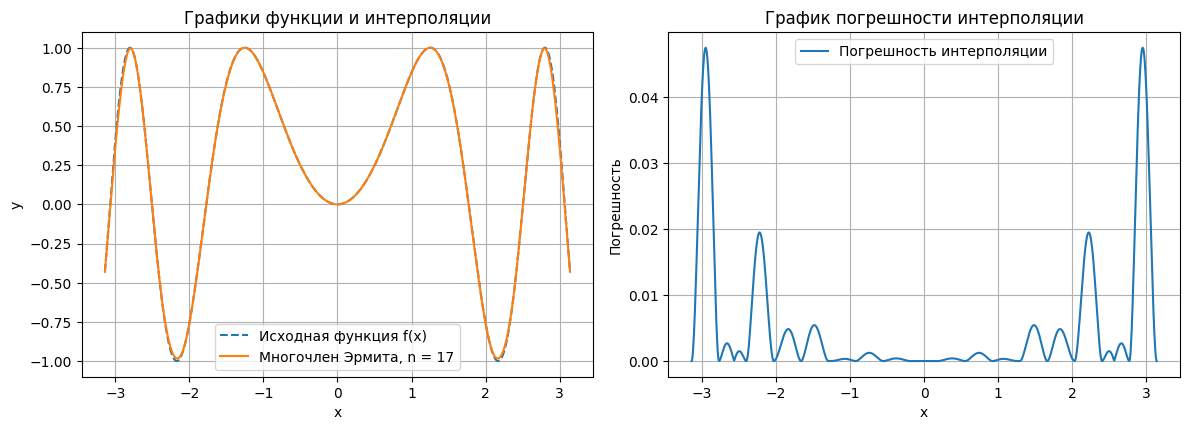

In [12]:
interpolate_ermit(a, b, epsilon)

# Многочлен Ньютона с разделенными разностями

In [21]:
def devid_newton(x_points, x_list, coeffs):
    return np.array([approximation.newton_devided(x, x_list, coeffs) for x in x_points])

In [22]:
def interpolate_newton_devided(a, b, epsilon):
    n = 1  
    max_error = float('inf')
    errors = []

    while max_error > epsilon:

        x_list = np.linspace(a, b, n + 1)
        y_list = f(x_list)

        coeffs = approximation.devided_differences(x_list, y_list)


        control_points = np.linspace(a, b, 1000)

        P = devid_newton(control_points, x_list, coeffs)
        current_error = error(f, P, control_points)
        max_error = np.max(current_error)
        errors.append((n, max_error))

        if max_error > epsilon:
            n += 1  

    x_points = np.linspace(a, b, 1000)

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(x_points, f(x_points), '--', label="Исходная функция f(x)")
    plt.plot(x_points, devid_newton(x_points, x_list, coeffs), label=f"Многочлен Ньютона с разделенными разностями, n = {n}")
    plt.title("Графики функции и интерполяции")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(control_points, current_error, label="Погрешность интерполяции")
    plt.title("График погрешности интерполяции")
    plt.xlabel("x")
    plt.ylabel("Погрешность")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

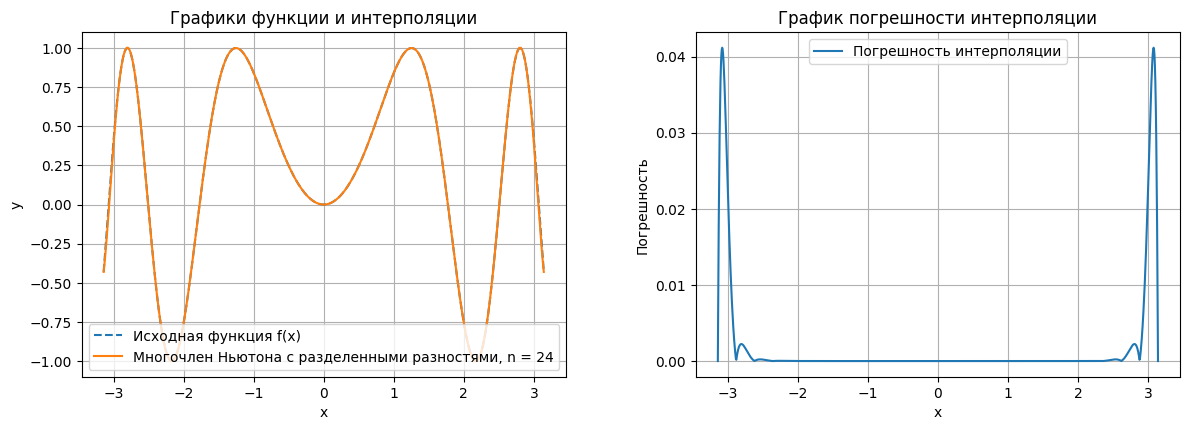

In [23]:
interpolate_newton_devided(a, b, epsilon)

# Многочлен Ньютона с коннечными  разностями

In [25]:
def fin_newton(x_points, x_list, coeffs, h):
    return np.array([approximation.newton_finite(x, x_list, coeffs, h) for x in x_points])

In [26]:
def interpolate_newton_fin(a, b, epsilon):
    n = 1  
    max_error = float('inf')
    errors = []

    while max_error > epsilon:

        x_list = np.linspace(a, b, n + 1)
        y_list = f(x_list)
        h = (b - a) / n

        coeffs = approximation.finite_differences(x_list, y_list)


        control_points = np.linspace(a, b, 1000)

        P = fin_newton(control_points, x_list, coeffs, h)
        current_error = error(f, P, control_points)
        max_error = np.max(current_error)
        errors.append((n, max_error))

        if max_error > epsilon:
            n += 1  

    x_points = np.linspace(a, b, 1000)

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(x_points, f(x_points), '--', label="Исходная функция f(x)")
    plt.plot(x_points, fin_newton(x_points, x_list, coeffs, h), label=f"Многочлен Ньютона c  n = {n}")
    plt.title("Графики функции и интерполяции")
    plt.xlabel("x")
    plt.legend()
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(control_points, current_error)
    plt.title("График погрешности интерполяции")
    plt.xlabel("x")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

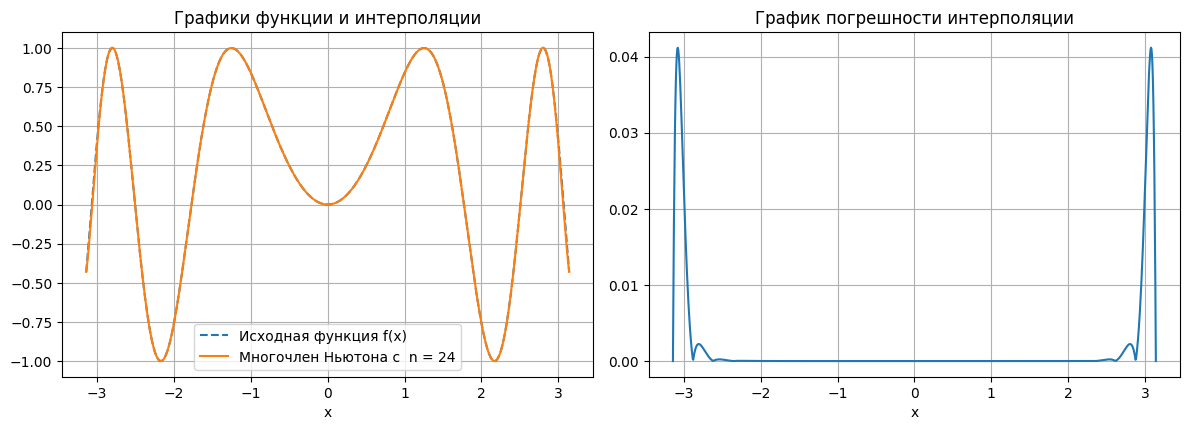

In [27]:
interpolate_newton_fin(a, b, epsilon)